# Data Analysis on Stack Overflow Survey - 2018

The 2018 Stack Overflow Annual Developer Survey is a comprehensive survey of software developers filled in by more than 100,000 respondents. The full dataset is avaialble on https://insights.stackoverflow.com/survey

In this analysis I identify those developers, who have changed career in the last five years and try to find answers for the following questions:

-  **What type of roles do career changers look for?**
-  **How satisfied are career changers with their developer career thus far?**
-  **What do they want to achieve in five years?**


## 1. Importing Necessary Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

## 2. Function Definitions

I defined some functions which may be reused several times to make the whole notebook cleaner.

**get_unique_values(df_colum, delim=',')**

    This function checks all cells of a dataframe column and returns all unique values as a set. We need this because Pandas' df.column.unique() handles each cell as a unique label. We want to identify different labels within a single cell, separated by the delimiter.

**count_labels_in_col(df_column, delim=',')**

    This function sums up the occurances of labels found in a column of a dataframe. The specialty of this function is that it recognizes more than one label within the same cell, separated by the delimiter.


In [2]:
def get_unique_values(df_column, delim=','):
    '''
    INPUT
        df_column - a column of a dataframe; string required
        delim - delimiter of data (labels) within a cell
    
    OUTPUT
        a set of unique values in the column of the dataset
    '''
    
    return set([i for j in df_column.dropna() for i in j.split(delim)])

def count_labels_in_col(df_column, delim=','):
    '''
    INPUT
        df_column - a column of a dataframe; string required
        delim - delimiter of data (labels) within a cell
    
    OUTPUT
        a dataframe with two columns: labels, count
    '''
    ctr = Counter([i for j in df_column.dropna() for i in j.split(delim)])
    return pd.DataFrame.from_dict(ctr, orient='index').reset_index().rename(columns={'index':'labels', 0:'count'})

## 3. Getting to Know the Data Set

In this part I read and examine the 2018 survey data.


In [3]:
df = pd.read_csv('survey_results_public2018.csv', index_col='Respondent', low_memory=False)
df.head(5)

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
Respondent,,,,,,,,,,,,,,,,,,,,,
1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [4]:
df.shape

(98855, 128)

The dataset has 98,855 survey reports and 128 columns (questions to respondents).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98855 entries, 1 to 101548
Columns: 128 entries, Hobby to SurveyEasy
dtypes: float64(41), object(87)
memory usage: 97.3+ MB


41 of the 128 columns hold numerical data, while the rest (87) are categorical.

In [6]:
df.describe()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Let's take a look at how many missing values we have and how many unique values/labels we find in each column.

In [7]:
overview = pd.DataFrame([(c, df[c].isnull().sum(), df[c].nunique()) for c in df.columns], columns=['Feature', 'NaNs', 'Unique'])
overview

,Feature,NaNs,Unique
0,Hobby,0,2
1,OpenSource,0,2
2,Country,412,183
3,Student,3954,3
4,Employment,3534,6
5,FormalEducation,4152,9
6,UndergradMajor,19819,12
7,CompanySize,27324,8
8,DevType,6757,9568
9,YearsCoding,5020,11


## 4. Identifying career changers

Let's gather information about the age and number of years of professional experience as software developers.

Using the function **get_unique_values()** collect the labels for the age and years of experience. Then I save the labels in order, so as I can use it properly for the x asises of the diagrams.

In [8]:
get_unique_values(df.Age)

{'18 - 24 years old',
 '25 - 34 years old',
 '35 - 44 years old',
 '45 - 54 years old',
 '55 - 64 years old',
 '65 years or older',
 'Under 18 years old'}

In [9]:
orderedLabesAge = ['Under 18 years old', '18 - 24 years old', '25 - 34 years old', '35 - 44 years old', 
                   '45 - 54 years old', '55 - 64 years old', '65 years or older']

In [10]:
get_unique_values(df.YearsCodingProf)

{'0-2 years',
 '12-14 years',
 '15-17 years',
 '18-20 years',
 '21-23 years',
 '24-26 years',
 '27-29 years',
 '3-5 years',
 '30 or more years',
 '6-8 years',
 '9-11 years'}

In [11]:
orderedLabesProfYears = ['0-2 years', '3-5 years', '6-8 years', '9-11 years', '12-14 years', '15-17 years', '18-20 years', 
       '21-23 years', '24-26 years', '27-29 years', '30 or more years']

Next, see the distributions by age and years of experience.

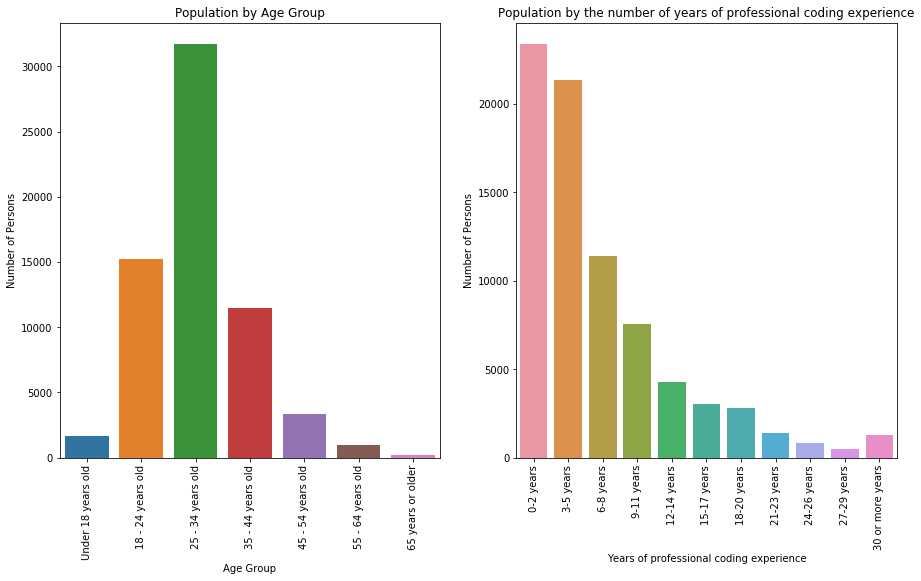

In [12]:
fig, ax1 = plt.subplots(1,2, figsize=(15,8))
g1 = sns.countplot(x=df.Age, order=orderedLabesAge, ax=ax1[0], data=df)
g1.set_title('Population by Age Group')
g1.set_xlabel('Age Group')
g1.set_ylabel('Number of Persons')
g1.xaxis.set_ticklabels(orderedLabesAge, rotation=90)
g2 = sns.countplot(x=df.YearsCodingProf, order=orderedLabesProfYears, ax=ax1[1], data=df)
g2.set_title('Population by the number of years of professional coding experience')
g2.set_xlabel('Years of professional coding experience')
g2.set_ylabel('Number of Persons')
g2.xaxis.set_ticklabels(orderedLabesProfYears, rotation=90)
plt.show()

### Identifying those, who changed their career and became software developers

First I narrow down the respondents to group ages from 35 to 64 years old. From these polulation I subtract those, who have 0 to 5 years of professional coding experience. At the end, we can say, that in the **changers** data frame everybody is a fresh developer but they started their career as non-developers. (This is, because I filtered out younger developers by their age.)
We can continue the examination with 1523 respondents.

In [13]:
ageOfInterest = df[df['Age'].isin(['35 - 44 years old', '45 - 54 years old', '55 - 64 years old'])]
changers = ageOfInterest[ageOfInterest['YearsCodingProf'].isin(['0-2 years', '3-5 years'])]
changers.shape

(1523, 128)

## 5. What type of roles do career changers look for?

Who are the career changers, what kind of roles, positions they fill?
Let's find the answer from the DevType column. We can see, that one person could select more than one role. To collect all responses first I use the **get_unique_values()** function, then I count the labels with the **count_labels_in_col()** function.

In [14]:
df.DevType.unique()

array(['Full-stack developer',
       'Database administrator;DevOps specialist;Full-stack developer;System administrator',
       'Engineering manager;Full-stack developer', ...,
       'Back-end developer;Data or business analyst;Data scientist or machine learning specialist;Database administrator;Designer;Desktop or enterprise applications developer;Front-end developer;Mobile developer;Student;System administrator',
       'Back-end developer;Designer;Embedded applications or devices developer;Front-end developer;Game or graphics developer',
       'C-suite executive (CEO, CTO, etc.);Designer;Front-end developer;Product manager'], dtype=object)

In [15]:
devTypes = get_unique_values(df.DevType, delim=';')
devTypes

{'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student',
 'System administrator'}

In [16]:
changersDevType = count_labels_in_col(changers.DevType, delim=';')
changersDevType = changersDevType.sort_values('count', ascending=False)

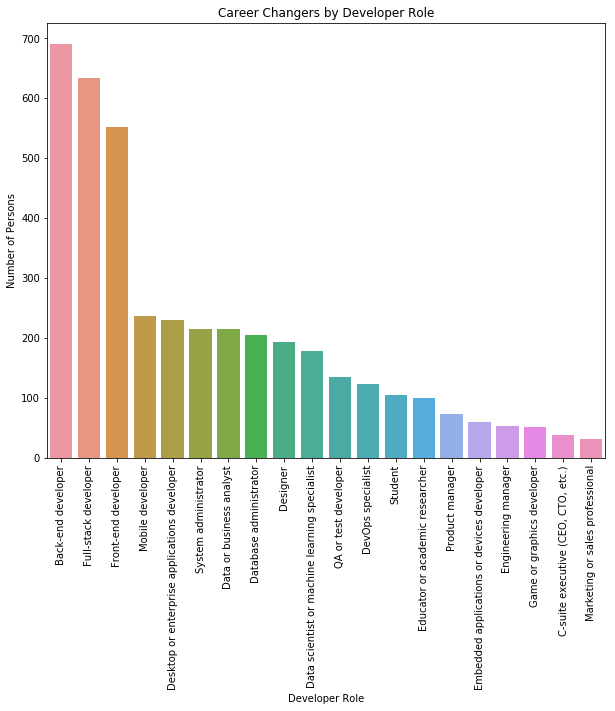

In [17]:
fig, ax1 = plt.subplots(figsize=(10,8))
g1 = sns.barplot(x='labels', y='count', order=changersDevType['labels'], ax=ax1, data=changersDevType)
g1.set_title('Career Changers by Developer Role')
g1.set_xlabel('Developer Role')
g1.set_ylabel('Number of Persons')
g1.xaxis.set_ticklabels(changersDevType['labels'], rotation=90)
plt.show()

From the diagram we see, that the three most popular roles are:
-  Back-end developer
-  Full-stack developer
-  Front-end developer

Let's compare this result to the whole population to see correlation or bias.

In [18]:
allDevType = count_labels_in_col(df.DevType, delim=';')
allDevType = allDevType.sort_values('count', ascending=False)

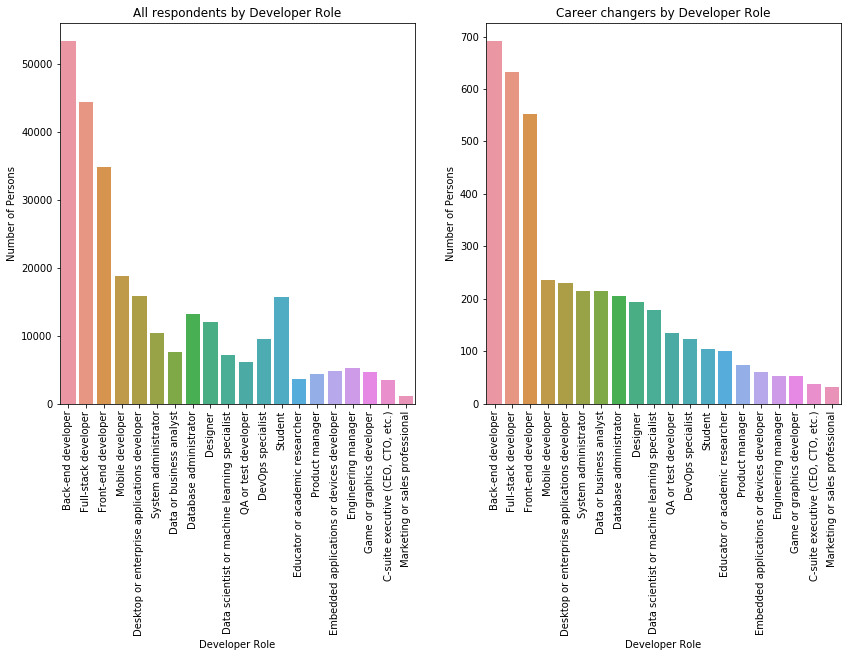

In [19]:
fig, ax1 = plt.subplots(1, 2, figsize=(14,7))
g1 = sns.barplot(x=allDevType['labels'], order=changersDevType['labels'], y=allDevType['count'], ax=ax1[0], data=df)
g1.set_title('All respondents by Developer Role')
g1.set_xlabel('Developer Role')
g1.set_ylabel('Number of Persons')
g1.xaxis.set_ticklabels(changersDevType['labels'], rotation=90)
g2 = sns.barplot(x=changersDevType['labels'], y=changersDevType['count'], ax=ax1[1], data=changers)
g2.set_title('Career changers by Developer Role')
g2.set_xlabel('Developer Role')
g2.set_ylabel('Number of Persons')
plt.xticks(rotation=90)
plt.show()

From the diagrams above we can see two things:
1.  Back-end, Full-stack and Front-end developer roles are much popular then the rest in the full datafram as well. That means, those roles are very general and it is not a surprise that lot of career changer checked those too.

2.  The distribution of career changers are significantly differ from the whole population's distribution. Let's investigate this further in the next part.

I merge **allDevType** and ** changersDevType** data frames and compare the numbers for each role. The highest ration will show those roles, which are mostly preferred by recent career changers.

In [20]:
compare = pd.merge(allDevType, changersDevType, on='labels')
compare['ratio']=compare['count_y']/compare['count_x']
compare.head(4)

,labels,count_x,count_y,ratio
0,Back-end developer,53300,691,0.012964
1,Full-stack developer,44353,633,0.014272
2,Front-end developer,34822,552,0.015852
3,Mobile developer,18804,236,0.012551


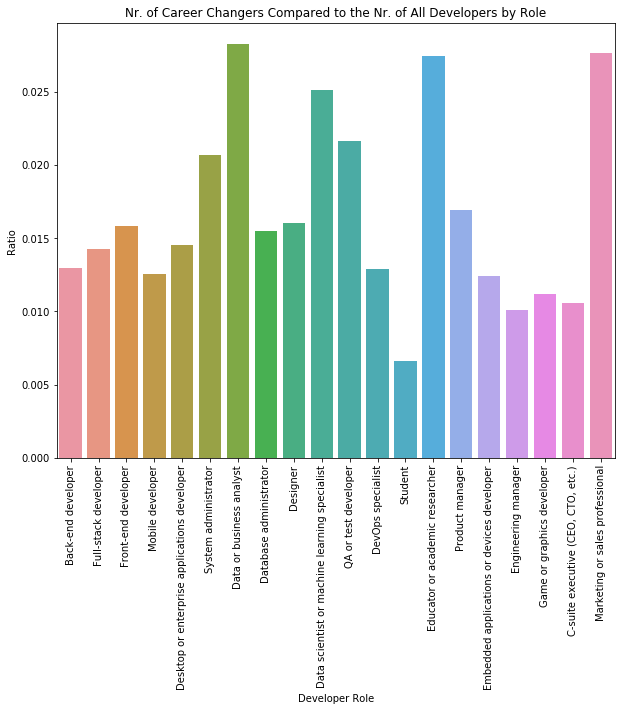

In [21]:
fig, ax1 = plt.subplots(figsize=(10,8))
g1 = sns.barplot(x='labels', y='ratio', order=changersDevType['labels'], ax=ax1, data=compare)
g1.set_title('Nr. of Career Changers Compared to the Nr. of All Developers by Role')
g1.set_xlabel('Developer Role')
g1.set_ylabel('Ratio')
g1.xaxis.set_ticklabels(changersDevType['labels'], rotation=90)
plt.show()

Getting the roles with the five highest ratio:

In [22]:
compare['labels'][compare['ratio'].nlargest(5).index]

10                         Data or business analyst
19                  Marketing or sales professional
17                  Educator or academic researcher
11    Data scientist or machine learning specialist
12                             QA or test developer
Name: labels, dtype: object

### Conclusion:

Career changers to become software developers preferred the following five roles:

1.  Data or business analyst
2.  Marketing or sales professional
3.  Educator or academic researcher
4.  Data scientist or machine learning specialist
5.  QA or test developer

## 6. How satisfied are career changers with their developer career thus far?



In [23]:
get_unique_values(df.CareerSatisfaction, delim=';')

{'Extremely dissatisfied',
 'Extremely satisfied',
 'Moderately dissatisfied',
 'Moderately satisfied',
 'Neither satisfied nor dissatisfied',
 'Slightly dissatisfied',
 'Slightly satisfied'}

In [24]:
changers.CareerSatisfaction.unique()

array(['Moderately satisfied', 'Slightly dissatisfied',
       'Extremely satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', 'Extremely dissatisfied',
       'Moderately dissatisfied'], dtype=object)

In [25]:
orderedLabesSat = ['Extremely dissatisfied', 'Moderately dissatisfied', 'Slightly dissatisfied', 
                   'Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied']

In [26]:
changersSat = count_labels_in_col(changers.CareerSatisfaction, delim=';')
changersSat = changersSat.sort_values('count', ascending=False)
changersSat

,labels,count
0,Moderately satisfied,505
2,Extremely satisfied,284
6,Slightly satisfied,245
3,Slightly dissatisfied,149
4,Neither satisfied nor dissatisfied,138
5,Moderately dissatisfied,123
1,Extremely dissatisfied,79


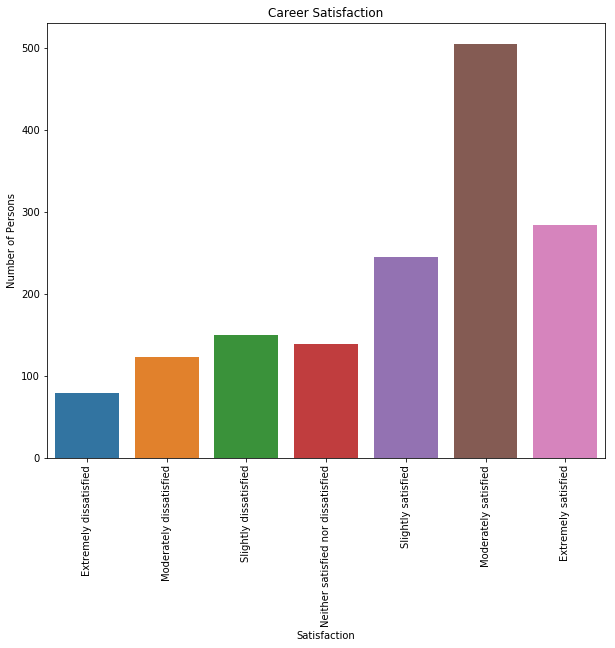

In [27]:
fig, ax1 = plt.subplots(figsize=(10,8))
g1 = sns.barplot(x='labels', y='count', order=orderedLabesSat, ax=ax1, data=changersSat)
g1.set_title('Career Satisfaction')
g1.set_xlabel('Satisfaction')
g1.set_ylabel('Number of Persons')
g1.xaxis.set_ticklabels(orderedLabesSat, rotation=90)
plt.show()

### Conclusion:

    Satisfied:   1034 developers
    Neutral:      138 developers
    Dissatisfied: 351 developers

There are three times more satisfied developers than dissatisfied.

## 5. What do career changers what to achieve in five years?

Finally, I examine how professional coders would like to see themselves in five years.

In [28]:
changers.HopeFiveYears.unique()

array([ "Working in a different or more specialized technical role than the one I'm in now",
       nan, 'Working as a founder or co-founder of my own company',
       'Doing the same work',
       'Working as an engineering manager or other functional manager',
       'Working as a product manager or project manager',
       'Working in a career completely unrelated to software development',
       'Retirement'], dtype=object)

In [29]:
fiveYearsLabels = get_unique_values(changers.HopeFiveYears, delim=';')
fiveYearsLabels

{'Doing the same work',
 'Retirement',
 'Working as a founder or co-founder of my own company',
 'Working as a product manager or project manager',
 'Working as an engineering manager or other functional manager',
 'Working in a career completely unrelated to software development',
 "Working in a different or more specialized technical role than the one I'm in now"}

In [30]:
fiveYears = count_labels_in_col(changers.HopeFiveYears, delim=';')
fiveYears = fiveYears.sort_values('count', ascending=False)
fiveYears

,labels,count
0,Working in a different or more specialized tec...,544
1,Working as a founder or co-founder of my own c...,358
2,Doing the same work,325
5,Working as an engineering manager or other fun...,137
4,Working as a product manager or project manager,92
6,Working in a career completely unrelated to so...,36
3,Retirement,25


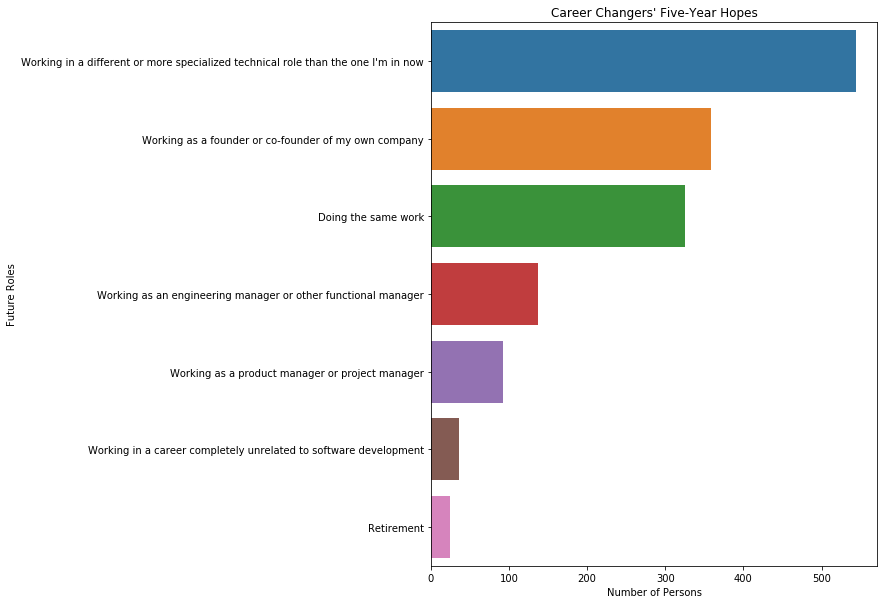

In [31]:
fig, ax1 = plt.subplots(figsize=(8,10))
g1 = sns.barplot(y='labels', x='count', order=fiveYears['labels'], ax=ax1, data=fiveYears)
g1.set_title('Career Changers\' Five-Year Hopes')
g1.set_ylabel('Future Roles')
g1.set_xlabel('Number of Persons')
g1.yaxis.set_ticklabels(fiveYears['labels'])
plt.show()

### Conclusion:

Career changers like their current software developer role. Their hopes for the future are:

1.  Working in a different or more specialized technical role
2.  Working as a founder or co-founder of their own company
3.  Doing the same work

## This is the end of the analysis.